# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [27]:
import hvplot.pandas
import pandas as pd
import requests
import geoviews as gv
from geoviews.tile_sources import CartoLight

from holoviews import opts, dim

from api_keys import geoapify_key

In [34]:
city_data_df = pd.read_csv("../output_data/cities.csv")

city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,kabwe,-14.4469,28.4464,59.666,67,16,2.42,ZM,1716672681
1,1,albany,42.6001,-73.9662,80.222,50,100,0.34,US,1716672460
2,2,blackmans bay,-43.0167,147.3167,37.526,95,33,2.04,AU,1716672681
3,3,kodiak,57.7900,-152.4072,45.914,71,100,6.17,US,1716672681
4,4,atafu village,-8.5421,-172.5159,85.496,76,48,6.37,TK,1716672682


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.
### Instead of having the cities on the side, like the example solution, i made the names appear when you hover instead.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
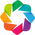

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City)

In [39]:
%%capture --no-display

gv.extension('bokeh')

points = city_data_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True, 
    size='Humidity', 
    color='Humidity', 
    alpha=0.6, 
    tiles='CartoLight', 
    frame_width=800, 
    frame_height=600, 
    title='City Humidity Levels',
    hover_cols = ["City", "Lat", "Lng", "Humidity"]
)

points.opts(opts.Points(size=dim('Humidity')*0.1, color='Humidity', cmap='Viridis', tools=['hover'], width=800, height=600, ))

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [42]:
filtered_cities_df = city_data_df[
    (city_data_df['Max Temp'] > 80) &
    (city_data_df['Humidity'] > 60) &
    (city_data_df['Cloudiness'] < 30)
]

filtered_cities_df = filtered_cities_df.dropna()

points = filtered_cities_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True, 
    size='Humidity', 
    color='Humidity', 
    alpha=0.6, 
    tiles='CartoLight', 
    frame_width=800, 
    frame_height=600, 
    title='City Humidity Levels',
    hover_cols = ["City", "Lat", "Lng", "Humidity"]
)

points.opts(opts.Points(size=dim('Humidity')*0.1, color='Humidity', cmap='Viridis', tools=['hover'], width=800, height=600, ))

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City)

### Step 3: Create a new DataFrame called `hotel_df`.

In [43]:
hotel_df = filtered_cities_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

hotel_df = hotel_df.assign(Hotel_Name='')

hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel_Name
36,tando muhammad khan,PK,25.1230,68.5358,62,
56,itaituba,BR,-4.2761,-55.9836,74,
60,bel ombre,SC,-4.6167,55.4167,79,
96,bathsheba,BB,13.2167,-59.5167,89,
139,georgetown,MY,5.4112,100.3354,79,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [52]:
radius = 10000
lat = 0
lng = 0

print("Starting hotel search")

for index, row in hotel_df.iterrows():
  
    lat = row['Lat']
    lng = row['Lng']    
    
    params = {
        "categories": "accommodation.hotel",
        "filter": f"circle:{lng},{lat},{radius}", 
        "limit": 1, 
        "apiKey": geoapify_key,
    }

    base_url = "https://api.geoapify.com/v2/places"
    response = requests.get(base_url, params=params)

    name_address = response.json()
    
    data = response.json()
    
    try:
            hotel_df.loc[index, "Hotel Name"] = data["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
          
            hotel_df.loc[index, "Hotel Name"] = "No hotel found"
  
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

hotel_df

Starting hotel search
tando muhammad khan - nearest hotel: No hotel found
itaituba - nearest hotel: Hotel Apiacás
bel ombre - nearest hotel: Hilton Seychelles Northholme Resort & Spa
bathsheba - nearest hotel: Clifton Hall Great House
georgetown - nearest hotel: The Century Boutique Hotel
bikenibeu village - nearest hotel: Otintaai Hotel
kingston - nearest hotel: The Kingston Hilton Hotel
granbury - nearest hotel: La Quinta Inn & Suites by Wyndham Granbury
berbera - nearest hotel: Barwaaqo Hotel
paddhari - nearest hotel: No hotel found
road town - nearest hotel: Sebastian's on the Beach
hilton head island - nearest hotel: Marriott Hilton Head Resort & Spa
sanibel - nearest hotel: The Neptune Resort
uturoa - nearest hotel: Raiatea Lodge
bubaque - nearest hotel: Saldomar B&Biosphere
isla mujeres - nearest hotel: Casa Namal
puerto baquerizo moreno - nearest hotel: Galapagos Sunset Hotel
pasuquin - nearest hotel: Villa del Marj
kavieng - nearest hotel: Kavieng Niu Lodge
ebon - nearest hote

,City,Country,Lat,Lng,Humidity,Hotel_Name,Hotel Name
36,tando muhammad khan,PK,25.1230,68.5358,62,,No hotel found
56,itaituba,BR,-4.2761,-55.9836,74,,Hotel Apiacás
60,bel ombre,SC,-4.6167,55.4167,79,,Hilton Seychelles Northholme Resort & Spa
96,bathsheba,BB,13.2167,-59.5167,89,,Clifton Hall Great House
139,georgetown,MY,5.4112,100.3354,79,,The Century Boutique Hotel
171,bikenibeu village,KI,1.3673,173.1241,84,,Otintaai Hotel
177,kingston,JM,17.9970,-76.7936,74,,The Kingston Hilton Hotel
206,granbury,US,32.4421,-97.7942,69,,La Quinta Inn & Suites by Wyndham Granbury
235,berbera,SO,10.4396,45.0143,63,,Barwaaqo Hotel
256,paddhari,IN,22.4333,70.6000,81,,No hotel found


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [53]:
%%capture --no-display

map_plot = hotel_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True, 
    size='Humidity', 
    color='Humidity', 
    alpha=0.6, 
    tiles='CartoLight', 
    frame_width=800, 
    frame_height=600, 
    title='City Humidity Levels',
    hover_cols=['City', 'Country', 'Hotel Name', 'Humidity']
)

map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City,Country,Hotel Name)